In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"file:///C:\Users\dell\Downloads\pandas\MagicBricks.csv")

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df['Furnishing'].nunique()

3

In [5]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [6]:
df.shape

(1259, 11)

In [7]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
df['Parking']=df['Parking'].fillna(df['Parking'].mean())

In [9]:
df['Parking'].isnull().sum()

0

In [10]:
df['Per_Sqft']=df['Per_Sqft'].fillna(df['Per_Sqft'].mean())

In [11]:
df['Per_Sqft'].isna().sum()

0

In [12]:
df['Furnishing']=df['Furnishing'].fillna(df['Furnishing'].mode()[0])

In [13]:
df['Furnishing'].isna().sum()

0

In [14]:
df['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [15]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [16]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [17]:
df['Type']=df['Type'].fillna(df['Type'].mode()[0])

In [18]:
df['Bathroom']=df['Bathroom'].fillna(df['Bathroom'].mean())

In [19]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [20]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


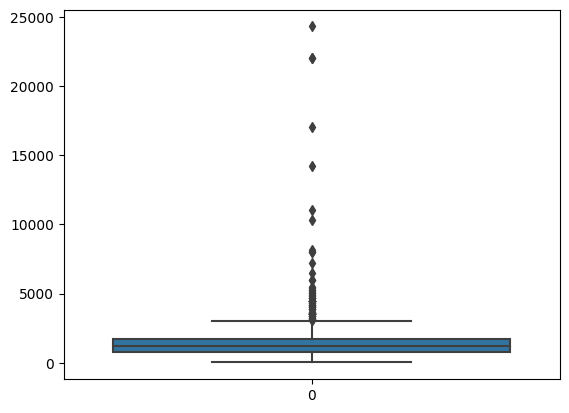

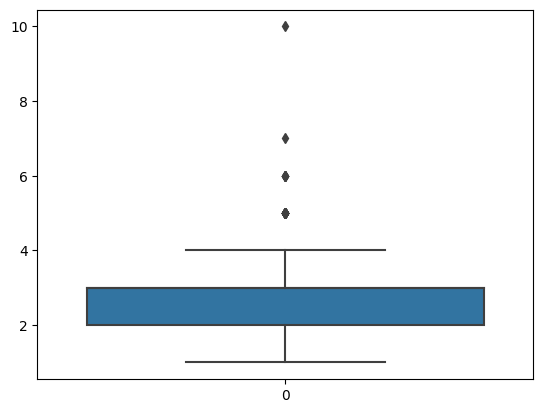

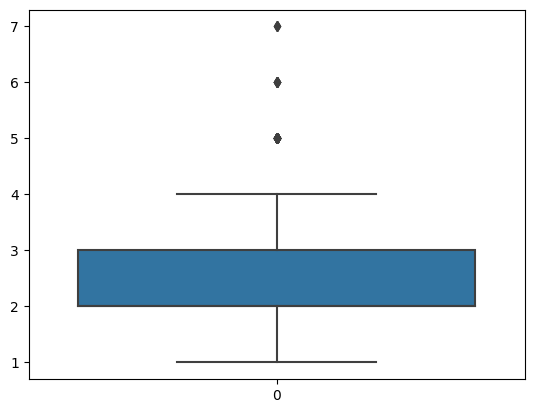

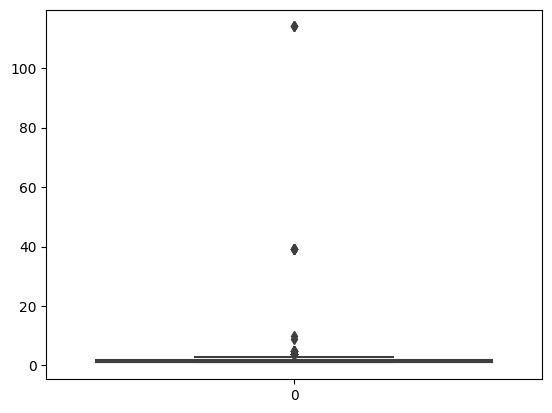

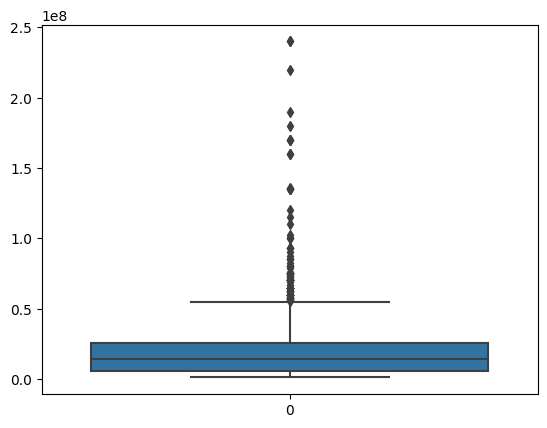

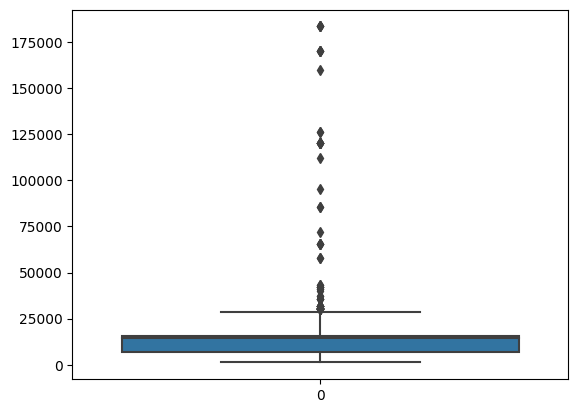

In [21]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.boxplot(df[i])
plt.show()

<Figure size 640x480 with 0 Axes>

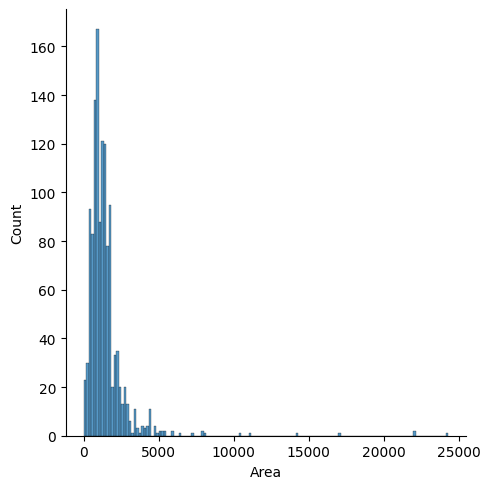

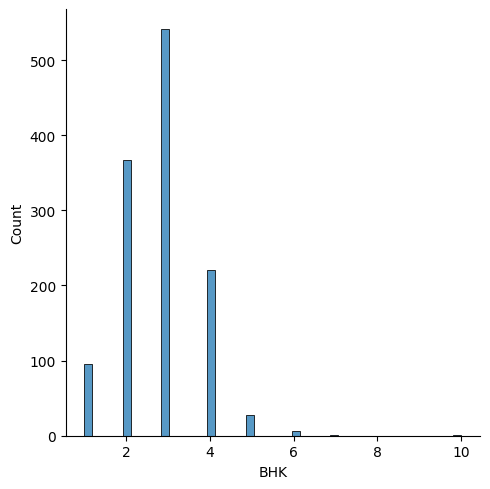

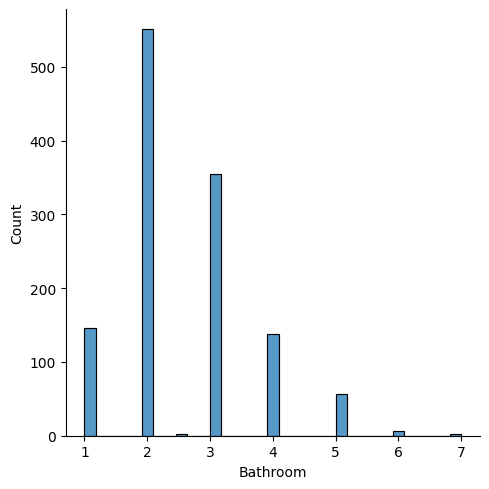

<Figure size 640x480 with 0 Axes>

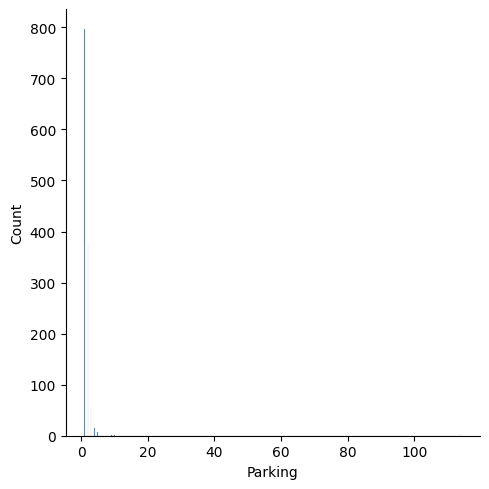

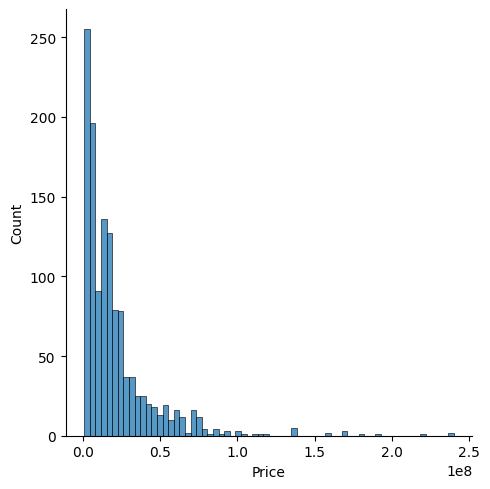

<Figure size 640x480 with 0 Axes>

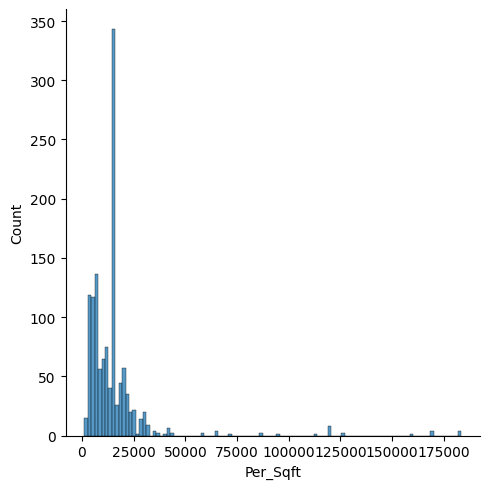

In [22]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.displot(df[i])
plt.show()

In [23]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df=df[(df[column]<upper_limit) & (df[column]>lower_limit)]
    return df

In [24]:
df=remove_outliers(df,'Per_Sqft')

In [25]:
df.shape

(1185, 11)

In [26]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [27]:
df['Per_Sqft'].max()

28846.0

In [28]:
df['Per_Sqft'].min()

1259.0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1185 non-null   float64
 1   BHK          1185 non-null   int64  
 2   Bathroom     1185 non-null   float64
 3   Furnishing   1185 non-null   object 
 4   Locality     1185 non-null   object 
 5   Parking      1185 non-null   float64
 6   Price        1185 non-null   int64  
 7   Status       1185 non-null   object 
 8   Transaction  1185 non-null   object 
 9   Type         1185 non-null   object 
 10  Per_Sqft     1185 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 111.1+ KB


In [30]:
df['Per_Sqft'].mean()

12364.568697620054

In [31]:
df['Price'].min()

1000000

In [32]:
df['Price'].max()

240000000

In [33]:
df['Parking'].min()

1.0

In [34]:
df['Parking'].max()

114.0

In [35]:
df['Bathroom'].min()

1.0

In [36]:
df['BHK'].min()

1

In [37]:
df['Price'].head()

0     6500000
1     5000000
2    15500000
3     4200000
4     6200000
Name: Price, dtype: int64

In [38]:
df['Area'].min()

28.0

In [39]:
df['Area'].max()

24300.0

In [40]:
df['Bathroom'].max()


7.0

In [41]:
df=remove_outliers(df,'Area')

In [42]:
df=remove_outliers(df,'Bathroom')

In [43]:
#df=remove_outliers(df,'Price')

In [44]:
df[i]

0       15690.136542
1        6667.000000
2        6667.000000
3        6667.000000
4        6667.000000
            ...     
1252    12916.000000
1253    12916.000000
1255    12916.000000
1256    12916.000000
1257    12916.000000
Name: Per_Sqft, Length: 1088, dtype: float64

In [46]:
df.corr()['Price']

C:\Users\dell\AppData\Local\Temp\ipykernel_4936\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Area        0.763430
BHK         0.528773
Bathroom    0.686795
Parking    -0.030512
Price       1.000000
Per_Sqft    0.463868
Name: Price, dtype: float64

In [47]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


C:\Users\dell\AppData\Local\Temp\ipykernel_19256\3549173170.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_19256\3549173170.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_19256\354917317

C:\Users\dell\AppData\Local\Temp\ipykernel_19256\3549173170.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_19256\3549173170.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_19256\354917317

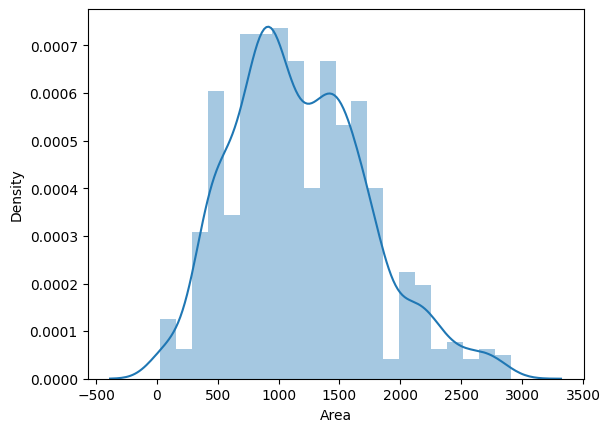

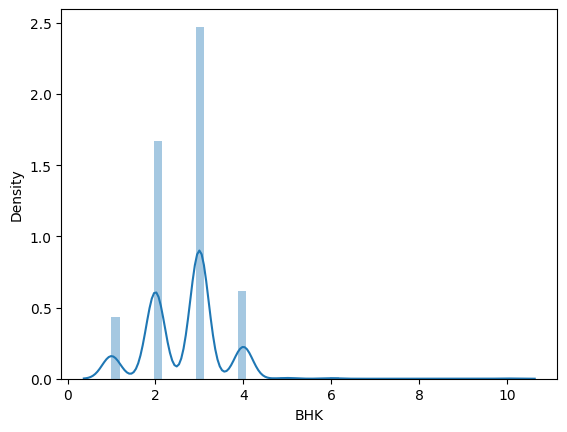

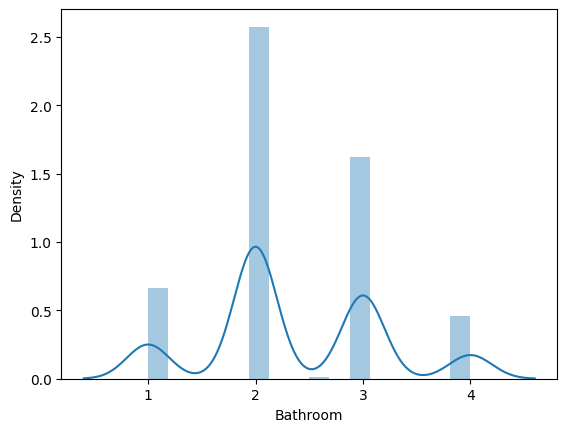

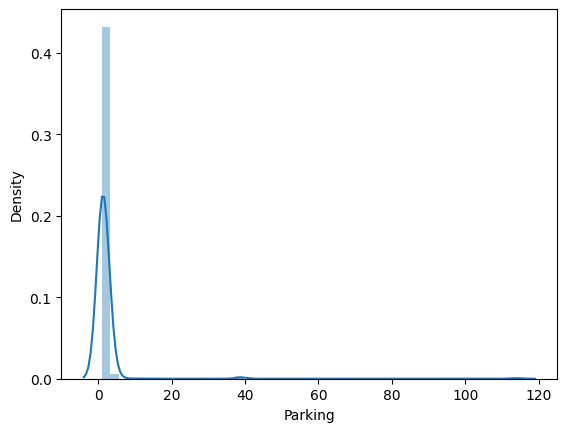

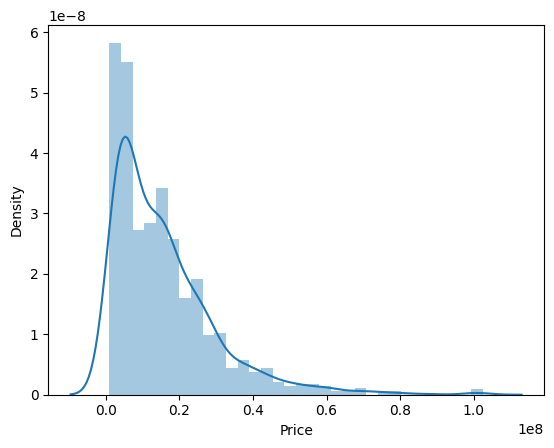

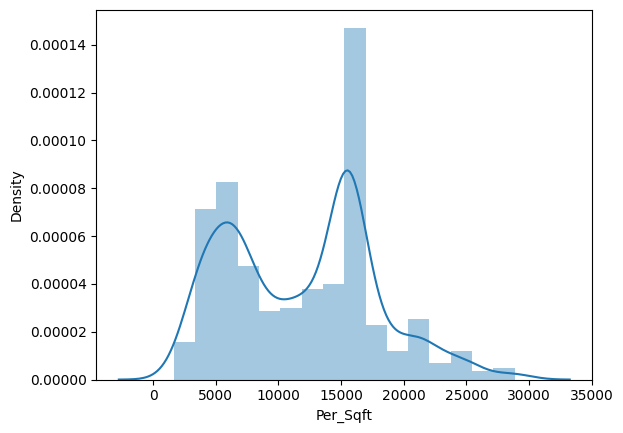

In [50]:
for index, i in enumerate(df.columns):
        if(df[i].dtype == np.float64 or df[i].dtype == np.int64):
              plt.figure(index)
              sns.distplot(df[i])
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_4936\4146412724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


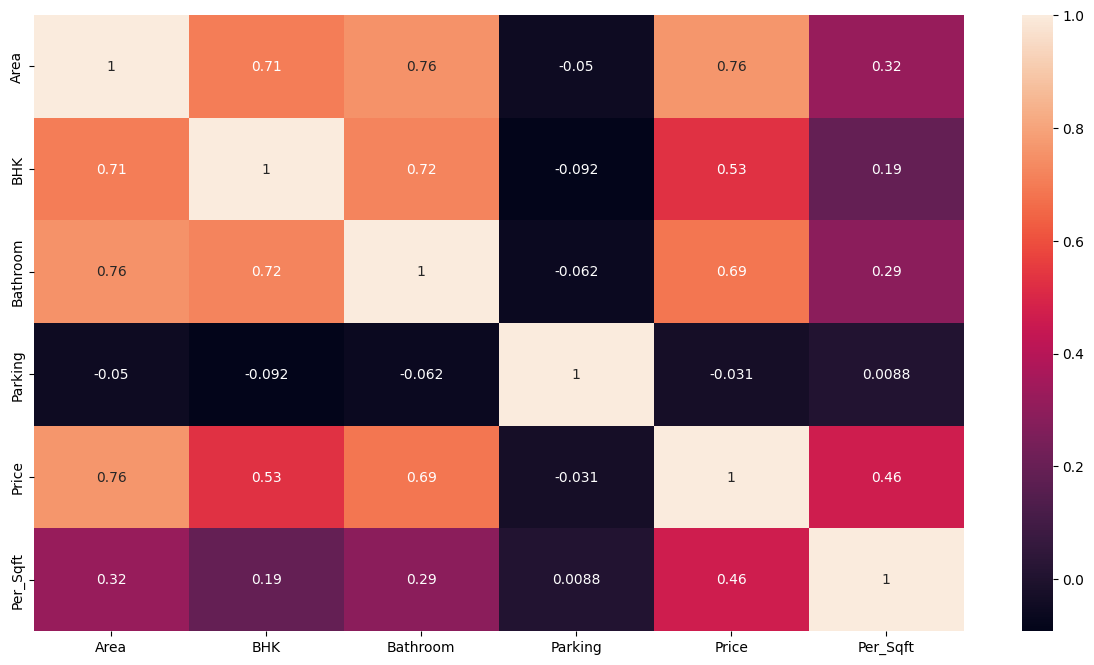

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

<Axes: xlabel='[Price]', ylabel='Per_Sqft'>

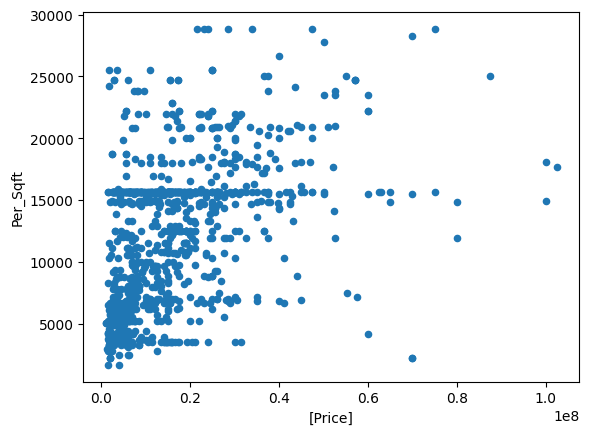

In [49]:
df.plot(kind="scatter",x=['Price'],y='Per_Sqft')

<Axes: xlabel='[Area]', ylabel='Price'>

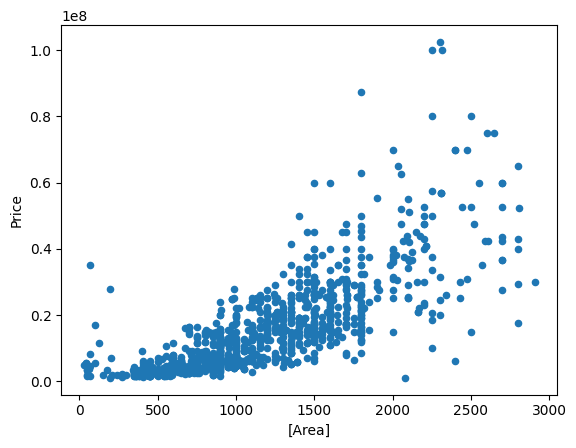

In [50]:
df.plot(kind="scatter",x=['Area'],y='Price')

In [51]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

<Axes: xlabel='[Bathroom]', ylabel='Area'>

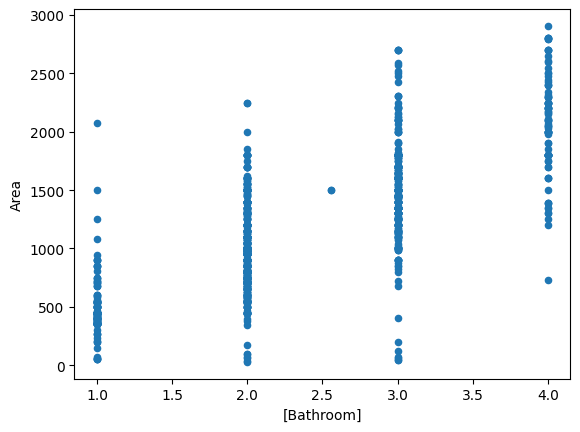

In [52]:
df.plot(kind="scatter",x=['Bathroom'],y='Area')

In [53]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [54]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [55]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [56]:
df['Type'].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [57]:
#from sklearn.preprocessing import LabelEncoder
#df['Furnishing']=LabelEncoder().fit_transform(df['Furnishing'])

In [58]:
#df['Type']=LabelEncoder().fit_transform(df['Type'])

In [59]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [60]:
df['Price'].mean()

15805919.11764706

In [61]:
X=df.drop(columns=['Parking','Price'])

In [62]:
X.head()

,Area,BHK,Bathroom,Furnishing,Locality,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [63]:
y=df['Price']

In [64]:
from sklearn.preprocessing import LabelEncoder


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [99]:
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(
    steps=[
        #("Scaling",StandardScaler())
          ("onehot",OneHotEncoder(sparse_output=False,drop='first'))]

)

In [100]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,['Furnishing','Transaction','Status','Locality','Type']),
     ])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1088 non-null   float64
 1   BHK          1088 non-null   int64  
 2   Bathroom     1088 non-null   float64
 3   Furnishing   1088 non-null   object 
 4   Locality     1088 non-null   object 
 5   Parking      1088 non-null   float64
 6   Price        1088 non-null   int64  
 7   Status       1088 non-null   object 
 8   Transaction  1088 non-null   object 
 9   Type         1088 non-null   object 
 10  Per_Sqft     1088 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 102.0+ KB


In [102]:
pipe=make_pipeline(preprocessor,LinearRegression())

In [103]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Furnishing', 'Transaction',
                                                   'Status', 'Locality',
                                                   'Type'])])),
                ('linearregression', LinearRegression())])

In [106]:
data = pd.DataFrame([[2,2.2,'Semi-Furnished',  6667.000000,'New_Property','Ready_to_move','J R Designers Floors, Rohini Sector 24',650.2,'Builder_Floor']],columns=['BHK', 'Bathroom', 'Furnishing', 'Per_Sqft','Transaction','Status','Locality','Area','Type'])
prediction = pipe.predict(data)
#	Rohini Sector 24 carpet area 650 sqft status R...	Ready_to_move	New_Property	Builder_Floor

In [107]:
prediction

array([8811546.78182217])

In [112]:
data['Pedict']=prediction

In [75]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [105]:
#lr.fit(X_train,y_train)

In [108]:
pipe.score(y_test,y_train)

ValueError: X does not contain any features, but ColumnTransformer is expecting 9 features

In [93]:
prediction

array([17104896.])

In [96]:
#pipe.predict(pd.DataFrame([['2'	,'2.0','Semi-Furnished',	6667.000000]],columns=['BHK	','Bathroom','Furnishing','Per_Sqft']))

array([17104896.])

In [77]:
from sklearn.metrics import r2_score

In [78]:
y_pred = pipe.predict(X_test)

In [109]:
r2_score(y_test,y_pred)

0.5436201689263143

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

#X_train = sc.fit_transform(X_train)
##X_test = sc.transform(X_test) 

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [70]:
#lr.fit(X_train,y_train)

In [71]:
#pred=lr.predict(X_test)

In [72]:
#from sklearn.metrics import r2_score

In [116]:
#bias = lr.score(X_train,y_train)
#print(bias)

#variance = lr.score(X_test,y_test)
#variance

In [74]:
#r2_score(pred,y_test)

NameError: name 'pred' is not defined